## Lista 1

https://byes.pl/wp-content/uploads/wyklady_prof_swiatka/MSiD/Zad_Lista_1.pdf

In [16]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from typing import List, Tuple, Callable, Union
import mplcursors

def income(coefficients: List[float], variables: List[float]) -> float:
        return sum(c * v for c, v in zip(coefficients, variables))

def create_constraints(constraints: List[Union[Tuple[List[float], float], Tuple[List[float], Callable[[List[float]], float]]]]) -> List[Callable[[List[float]], float]]:
    def create_single_constraint(a: List[float], b: Union[float, Callable[[List[float]], float]]) -> Callable[[List[float]], float]:
        if callable(a):
            return lambda x: b - a()
        else:
            return lambda x: b - sum(a_i * x_i for a_i, x_i in zip(a, x))
    return [create_single_constraint(a, b) for a, b in constraints]

def print_optimization_results(x0: List[float], zysk: List[float], constraints: List[Tuple[List[float], float]], _2d=True, maximize=True):
    if maximize:
        maximize = -1
    else:
        maximize = 1
    
    objective = lambda decision_vars, coefficients: maximize*income(coefficients, decision_vars)
    # Tworzenie funkcji ograniczeń
    cons = create_constraints(constraints)

    # Konwersja ograniczeń na format akceptowany przez 'minimize'
    scipy_constraints = [{'type': 'ineq', 'fun': con} for con in cons]

    # Uruchomienie optymalizacji
    result = minimize(
        fun=objective,
        x0=x0,
        args=(zysk,),
        constraints=scipy_constraints,
        method='SLSQP'
    )

    optimum_point = result.x

    print("Wynik optymalizacji:", optimum_point)
    print("Wartość funkcji celu w optimum:", maximize*result.fun)
    
    if _2d:
        # Obliczenie punktów przecięcia z osiami x i y
        x_intercepts = [b/a[0] if a[0] != 0 else float('inf') for a, b in constraints if a[0] > 0]
        y_intercepts = [b/a[1] if a[1] != 0 else float('inf') for a, b in constraints if a[1] > 0]

        # Znalezienie maksymalnych wartości przecięcia z osiami x i y
        x_max = max(x_intercepts) if x_intercepts else 0
        y_max = max(y_intercepts) if y_intercepts else 0

        # Dodanie marginesu
        margin = 5
        x_max += margin
        y_max += margin

        # Create a grid of x and y values
        x_values = np.linspace(0, x_max, 100)
        y_values = np.linspace(0, y_max, 100)
        X, Y = np.meshgrid(x_values, y_values)

        # Compute the objective function values on the grid
        Z = maximize*income(zysk, [X, Y])

        # Create a contour plot of the objective function
        fig, ax = plt.subplots(figsize=(12, 8))
        contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
        plt.colorbar(contour, label='Negative Income')

        # Add constraint lines
        x = np.linspace(0, x_max, 100)

        # Plot constraints dynamically
        for i, (a, b) in enumerate(constraints):
            if a[1] != 0:
                y_constraint = (b - a[0] * x) / a[1]
                label = f'{a[0]:.2f}x1 + {a[1]:.2f}x2 ≤ {b}'
            else:
                y_constraint = np.full_like(x, b / a[0])
                label = f'{a[0]:.2f}x1 ≤ {b}'
            ax.plot(x, y_constraint, linestyle='--', label=label)

        # Optimum point from the optimization algorithm
        ax.plot(optimum_point[0], optimum_point[1], 'ro', label='Optimum')

        # Plot the profit function passing through the optimum point
        optimum_profit = -maximize*income(zysk, optimum_point)
        ax.plot(x_values, (optimum_profit / zysk[1]) - ((zysk[0] / zysk[1]) * x_values), 'k-', label='Profit Function')

        ax.set_xlim(0, x_max)
        ax.set_ylim(0, y_max)
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_title('Objective Function Contour Plot with Constraints')
        ax.legend()
        ax.grid(True)

        # Add cursor displaying profit value
        mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(f"Profit: {-maximize*income(zysk, [sel.target[0], sel.target[1]]):.2f}"))
        
        plt.show()

def debug_constraints(constrains, x0): #Rozwiązanie możliwe gdy wszystkie wartości są dodatnie
    for i, f in enumerate(create_constraints(constrains)):
        print(f"OGR{i+1}: {f(x0)}")

def debug_zysk(zysk, x0):
    print(f"ZYSK: {income(zysk, x0)}")

Wynik optymalizacji: [2.5 4. ]
Wartość funkcji celu w optimum: 54.500000000120195


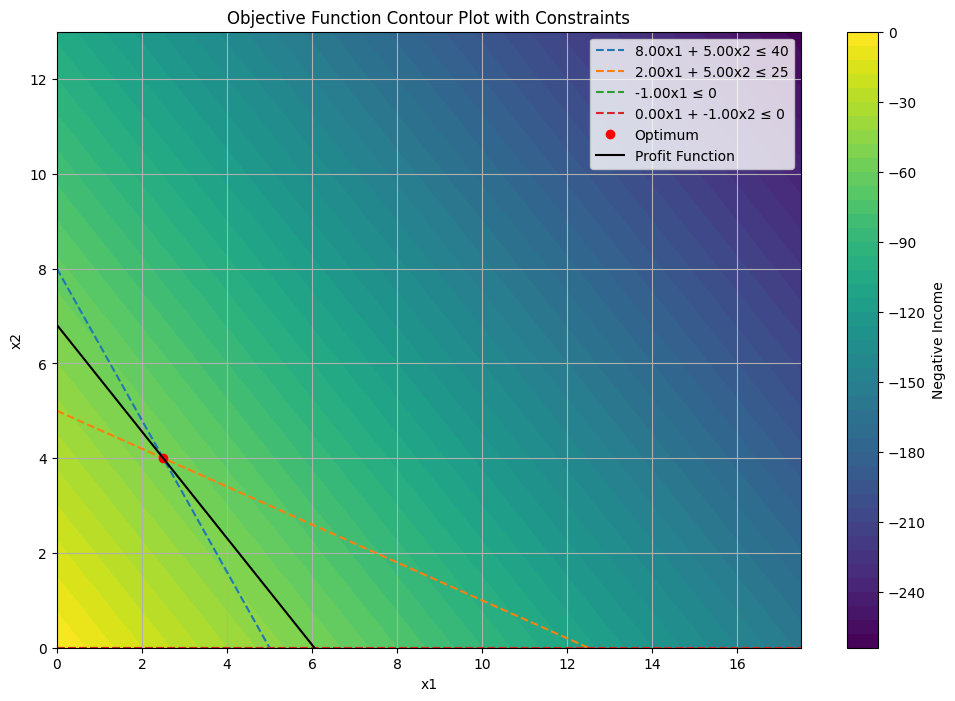

In [17]:
def zad1():
    # Wartości początkowe
        # I, II
    x0 = [0, 0]
    zysk = [9, 8]

    # Definicja ograniczeń 
    # ([a, b], c) oznacza a*x1 + b*x2 <= c
    constraints = [
        ([8, 5], 40),   # Ograniczenie zużycia surowca A
        ([2, 5], 25),   # Ograniczenie zużycia surowca B
        ([-1, 0], 0),   # Ograniczenie nieujemności x_1
        ([0, -1], 0)    # Ograniczenie nieujemności x_2
    ]

    print_optimization_results(x0, zysk, constraints)

zad1()

Wynik optymalizacji: [1250.00000002  416.66666666]
Wartość funkcji celu w optimum: 24583.333333482304


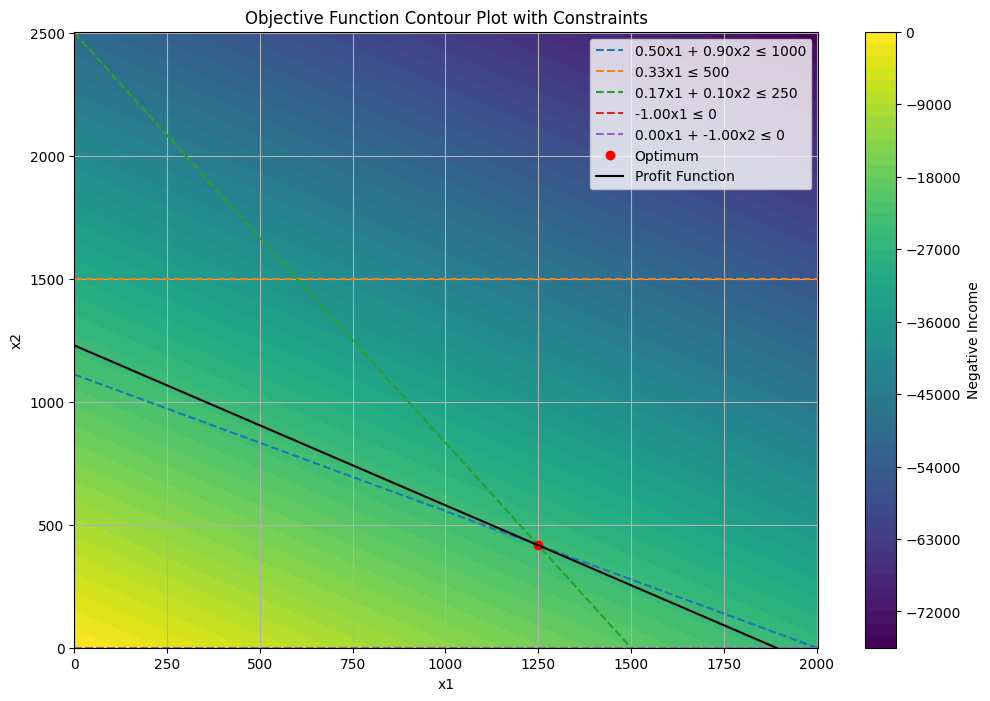

In [18]:
def zad2():
    # Wartości początkowe
        # FS, FH
    x0 = [0, 0]
    zysk = [13, 20]

    # Definicja ograniczeń
    # ([a, b], c) oznacza a*x1 + b*x2 <= c
    constraints = [
        ([0.5, 0.9], 1000),   # Ograniczenie mięsa
        ([1/3, 0], 500),      # Ograniczenie wypełniacza
        ([1/6, 0.1], 250),    # Ograniczenie soli
        ([-1, 0], 0),         # Ograniczenie nieujemności x_1
        ([0, -1], 0)          # Ograniczenie nieujemności x_2
    ]

    print_optimization_results(x0, zysk, constraints)

zad2()

Wynik optymalizacji: [40. 15.]
Wartość funkcji celu w optimum: 579.9999999972072


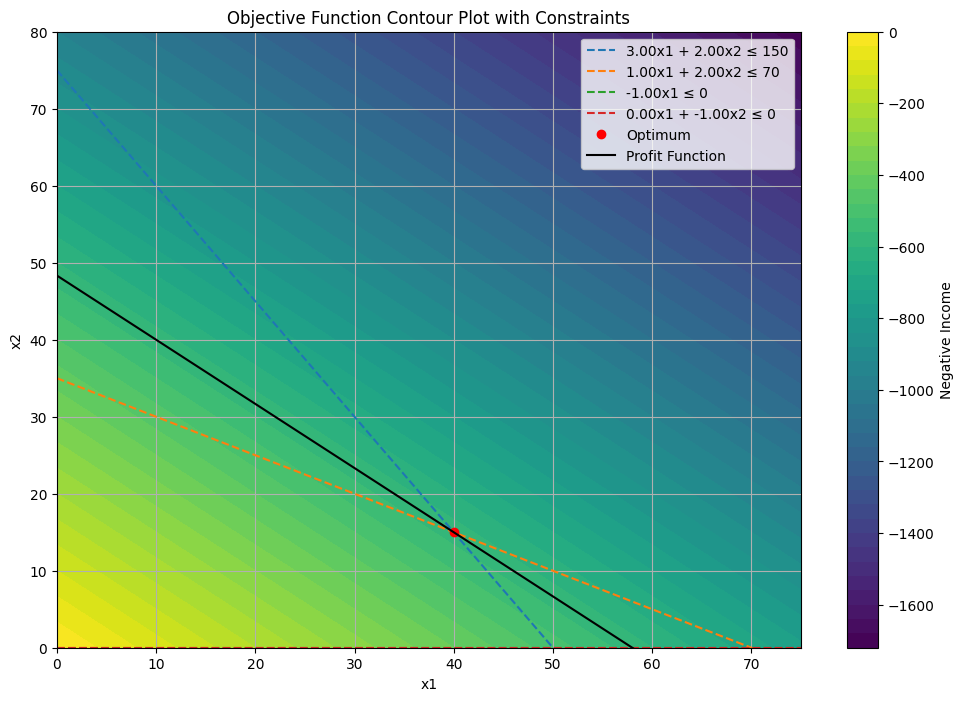

In [19]:
def zad3():
    # Wartości początkowe
        # A, B
    x0 = [0, 0]
    zysk = [10, 12]

    # Definicja ograniczeń
    # ([a, b], c) oznacza a*x1 + b*x2 <= c
    constraints = [
        ([3, 2], 150),   # Ograniczenie materiału M1
        ([1, 2], 70),    # Ograniczenie materiału M2
        ([-1, 0], 0),    # Ograniczenie nieujemności x_1
        ([0, -1], 0)     # Ograniczenie nieujemności x_2
    ]

    print_optimization_results(x0, zysk, constraints)

zad3()

In [20]:
def zad4():
    # Wartości początkowe
        # W1, W2, W3
    x0 = [0, 0, 0]
    zysk = [12, 25, 16]

    # Definicja ograniczeń
    # ([a, b], c) oznacza a*x1 + b*x2 <= c
    constraints = [
        ([5, 3, 0], 3500),   # Ograniczenie materiału S1
        ([1, 2, 4], 4700),    # Ograniczenie materiału S2
        ([-1, 0, 0], 0),    # Ograniczenie nieujemności x_1
        ([0, -1, 0], 0),     # Ograniczenie nieujemności x_2
        ([0, 0, -1], 0)     # Ograniczenie nieujemności x_3
    ]

    print_optimization_results(x0, zysk, constraints, _2d=False)

    # Wartości ograniczeń dla
    # x1 = 0, x2 = 1166, x3 = 591
    # (zaokrąglamy do całkowitych)
    debug_constraints(constraints, [0, 1166, 591]) #Rozwiązanie możliwe gdy wszystkie wartości są dodatnie
    debug_zysk(zysk, [0, 1166, 591])

zad4()

Wynik optymalizacji: [-1.73727699e-12  1.16666667e+03  5.91666667e+02]
Wartość funkcji celu w optimum: 38633.333333333176
OGR1: 2
OGR2: 4
OGR3: 0
OGR4: 1166
OGR5: 591
ZYSK: 38606


Wynik optymalizacji: [9.00000000e+01 3.40314443e-11]
Wartość funkcji celu w optimum: 9000.000000010888


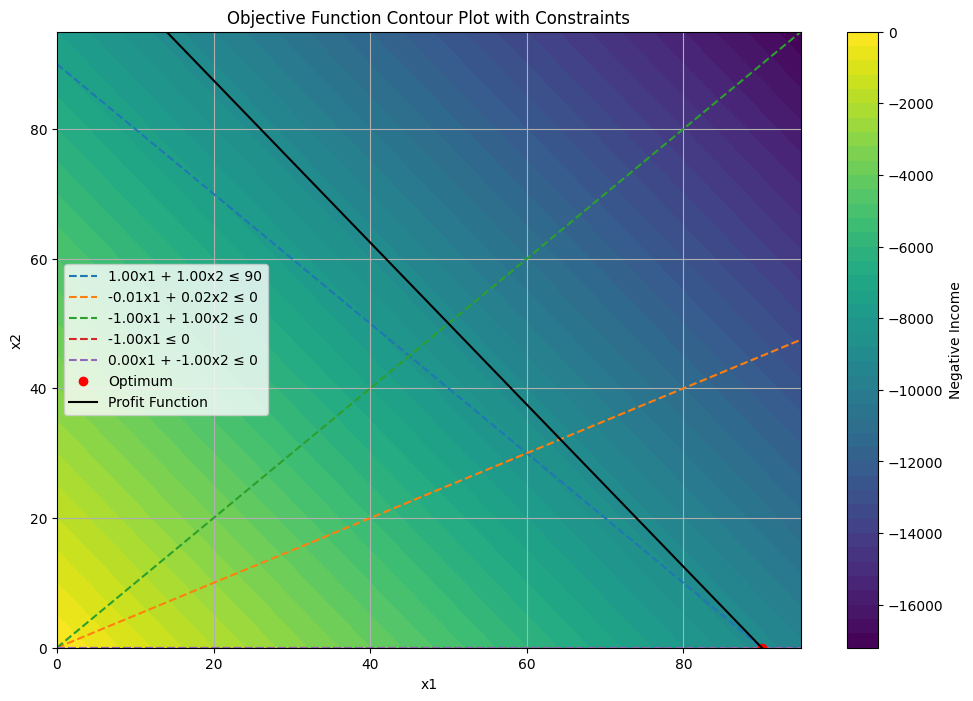

In [21]:
def zad5():
    # Wartości początkowe
        # A, B
    x0 = [0, 0] 
    zysk = [100, 80] 

    # Definicja ograniczeń
    # ([a, b], c) oznacza a*x1 + b*x2 <= c
    constraints = [
        ([1, 1], 90),   # Minimalna ilość paliwa
        ([0.02-0.03, 0.05-0.03], 0),  # Ograniczenie fosforu
        # To jest trochę trudne do ogarnięcia więc wytłumaczę:
        # ma być 0.02x + 0.03y <= (0.03)*(x+y) więc trzeba to przekształcić
        # poniższe adekwatnie
        ([3-4, 5-4], 0),  # Ograniczenie popiołu
        ([-1, 0], 0),          # Ograniczenie nieujemności x_1
        ([0, -1], 0)           # Ograniczenie nieujemności x_2
    ]

    print_optimization_results(x0, zysk, constraints)

zad5()

In [22]:
def zad6():
        # Wartości początkowe
        # W1, W2, W3
    x0 = [0, 0, 0]
    zysk = [600, 840, 720]

    # Definicja ograniczeń
    # ([a, b], c) oznacza a*x1 + b*x2 <= c
    constraints = [
        ([-5, -7, -8], -1120),   # Ograniczenie tkaniny T1
        ([-10, -7, -9], -1260),    # Ograniczenie tkaniny T2
        ([-8, -12, -10], -1800),    # Ograniczenie tkaniny T3
        ([-12, -10, -11], -1200),    # Ograniczenie tkaniny T4
        ([-6, -8, -9], -720),    # Ograniczenie tkaniny T5
        ([-1, 0, 0], 0),    # Ograniczenie nieujemności x_1
        ([0, -1, 0], 0),     # Ograniczenie nieujemności x_2
        ([0, 0, -1], 0)     # Ograniczenie nieujemności x_3
    ]

    print_optimization_results(x0, zysk, constraints, _2d=False, maximize=False)

    # Wartości ograniczeń dla
    # x1 = 0, x2 = 95, x3 = 67
    # (przy minimalizacji zaokr zawsze w górę)
    debug_constraints(constraints, [0, 95, 67]) #Rozwiązanie możliwe gdy wszystkie wartości są dodatnie
    debug_zysk(zysk, [0, 95, 67])

zad6()

Wynik optymalizacji: [-2.29593599e-08  9.47368421e+01  6.63157894e+01]
Wartość funkcji celu w optimum: 127326.31572718211
OGR1: 81
OGR2: 8
OGR3: 10
OGR4: 487
OGR5: 643
OGR6: 0
OGR7: 95
OGR8: 67
ZYSK: 128040


In [23]:
def zad7():
    #Czytałem długo i dalej nie wiem o co chodzi
    pass

zad7()

In [24]:
def zad8(): #To jest bardziej sensowne algorytmem zachłannym
    # Wartości początkowe
        # 1, 2, 3, 4
    x0 = [0, 0, 0, 0]
    zysk = [5, 3, 4, 8]

    # Definicja ograniczeń
    # ([a, b], c) oznacza a*x1 + b*x2 <= c
    constraints = [
        ([4, 2, 6, 5], 12),   # Ograniczenie ciężarów
        ([-1, 0, 0, 0], 0),    # Ograniczenie nieujemności 1
        ([0, -1, 0, 0], 0),     # Ograniczenie nieujemności 2
        ([0, 0, -1, 0], 0),     # Ograniczenie nieujemności 3
        ([0, 0, 0, -1], 0),     # Ograniczenie nieujemności 4
    ]

    print_optimization_results(x0, zysk, constraints, _2d=False)
    
    # Wartości ograniczeń dla
    # x1 = 0, x2 = 1, x3 = 0, x4 = 2
    debug_constraints(constraints, [0, 1, 0, 2]) #Rozwiązanie możliwe gdy wszystkie wartości są dodatnie
    debug_zysk(zysk, [0, 1, 0, 2])

zad8()

Wynik optymalizacji: [3.54766810e-13 8.04162292e-13 3.00743739e-13 2.40000000e+00]
Wartość funkcji celu w optimum: 19.200000000033384
OGR1: 0
OGR2: 0
OGR3: 1
OGR4: 0
OGR5: 2
ZYSK: 19
